# 1D Data

In [2]:
import pandas as pd
import numpy as np
from scipy.ndimage import uniform_filter
from scipy.interpolate import interp2d, interp1d


test = pd.DataFrame.from_dict({
    'frame': [0,1,2,3,4,5,6,7,8,9,10],
    'test': [
        np.nan,
        [1,2],
        np.nan,
        np.nan,
        [1,100],
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        [2,2]
    ],
    'radius': [np.nan,np.nan,3.,2.,2.,2.,np.nan,np.nan,np.nan,2.,1.]
})
print("pre interpolation:")
print(test)

# valid values
valid = ~test.radius.isna().values

# interpolation
inter = np.interp(test.frame.values, test.frame[valid].values, test.radius[valid].values)

# set
test.radius = inter.tolist()

# results
print("post interpolation:")
print(test)




pre interpolation:
    frame      test  radius
0       0       NaN     NaN
1       1    [1, 2]     NaN
2       2       NaN     3.0
3       3       NaN     2.0
4       4  [1, 100]     2.0
5       5       NaN     2.0
6       6       NaN     NaN
7       7       NaN     NaN
8       8       NaN     NaN
9       9       NaN     2.0
10     10    [2, 2]     1.0
post interpolation:
    frame      test  radius
0       0       NaN     3.0
1       1    [1, 2]     3.0
2       2       NaN     3.0
3       3       NaN     2.0
4       4  [1, 100]     2.0
5       5       NaN     2.0
6       6       NaN     2.0
7       7       NaN     2.0
8       8       NaN     2.0
9       9       NaN     2.0
10     10    [2, 2]     1.0


# 2D Data

    frame                                      test  radius  radius_rolling
0       0                                [1.0, 2.0]     1.0             1.0
1       1                                [1.0, 2.0]     2.0             1.5
2       2                 [1.0, 34.666666666666664]     3.0             2.5
3       3                  [1.0, 67.33333333333333]     2.0             2.5
4       4                              [1.0, 100.0]     2.0             2.0
5       5   [1.1666666666666667, 83.66666666666667]     2.0             2.0
6       6   [1.3333333333333333, 67.33333333333334]     1.0             1.5
7       7                               [1.5, 51.0]     2.0             1.5
8       8   [1.6666666666666665, 34.66666666666667]     2.0             2.0
9       9  [1.8333333333333333, 18.333333333333343]     2.0             2.0
10     10                                [2.0, 2.0]     1.0             1.5


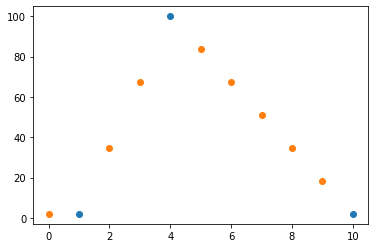

In [202]:
import pandas as pd
import numpy as np
from scipy.ndimage import uniform_filter
from scipy.interpolate import interp2d, interp1d


test = pd.DataFrame.from_dict({
    'frame': [0,1,2,3,4,5,6,7,8,9,10],
    'test': [
        np.nan,
        [1,2],
        np.nan,
        np.nan,
        [1,100],
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        np.nan,
        [2,2]
    ],
    'radius': [1.,2.,3.,2.,2.,2.,1.,2.,2.,2.,1.]
})

test['radius_rolling'] = uniform_filter(test.radius.to_numpy(), size=(2)).tolist()

# valid values
valid = ~test.test.isna().values

# nan nan
test.test = test.test.apply(lambda x: np.array(x) if x is not np.nan else np.full(2, np.nan))

# interpolation
values = np.stack(test.test)

inter = np.stack([
    np.interp(test.frame.values, test.frame[valid].values, values[valid][:,0]),
    np.interp(test.frame.values, test.frame[valid].values, values[valid][:,1])
], axis=-1)

# set
test.test = inter.tolist()

# results
print(test)


In [210]:
a = np.full(2, np.nan)
b = np.full(2, 3)
c = np.nan

print(np.isnan(a).any())
print(np.isnan(b).any())
print(np.isnan(c).any())

True
False
True
